In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing File
df = pd.read_excel('July Issues Cleaned.xlsx')
df.head()

,Date,Issued To,Items,Quantity,Unit Price,Amount
0,2023-07-01,Dr,REMMY AKONYA,NaN,NaN,NaN
1,NaT,NaN,2K Silver Paint,1.0,90000.0,90000.0
2,2023-07-03,Dr,OXFAM,NaN,NaN,NaN
3,NaT,NaN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,11.0,12000.0,132000.0
4,NaT,NaN,"Oil Filter 90915-30002-8T LC HZJ 78, 79,105",1.0,61200.0,61200.0


In [3]:
df.shape #Shape of our data - Rows and Columns

(4030, 6)

# Data Cleaning and Transformation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4030 entries, 0 to 4029
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        748 non-null    datetime64[ns]
 1   Issued To   748 non-null    object        
 2   Items       4028 non-null   object        
 3   Quantity    2543 non-null   float64       
 4   Unit Price  2543 non-null   float64       
 5   Amount      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 189.0+ KB


In [5]:
#Changing date column data type to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%A, %d %B %Y")
df.head()

,Date,Issued To,Items,Quantity,Unit Price,Amount
0,2023-07-01,Dr,REMMY AKONYA,NaN,NaN,NaN
1,NaT,NaN,2K Silver Paint,1.0,90000.0,90000.0
2,2023-07-03,Dr,OXFAM,NaN,NaN,NaN
3,NaT,NaN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,11.0,12000.0,132000.0
4,NaT,NaN,"Oil Filter 90915-30002-8T LC HZJ 78, 79,105",1.0,61200.0,61200.0


In [6]:
# Forward-fill missing dates
df["Date"].fillna(method="ffill", inplace=True)
df.head()

,Date,Issued To,Items,Quantity,Unit Price,Amount
0,2023-07-01,Dr,REMMY AKONYA,NaN,NaN,NaN
1,2023-07-01,NaN,2K Silver Paint,1.0,90000.0,90000.0
2,2023-07-03,Dr,OXFAM,NaN,NaN,NaN
3,2023-07-03,NaN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,11.0,12000.0,132000.0
4,2023-07-03,NaN,"Oil Filter 90915-30002-8T LC HZJ 78, 79,105",1.0,61200.0,61200.0


In [12]:
# Replacing non-null values in "Issued To" column with the corresponding non-null value in "Items" column
df.loc[df["Issued To"].notnull(), "Issued To"] = df.loc[df["Issued To"].notnull(), "Items"]
df.head()

,Date,Issued To,Items,Quantity,Unit Price,Amount
0,2023-07-01,REMMY AKONYA,REMMY AKONYA,NaN,NaN,NaN
1,2023-07-01,NaN,2K Silver Paint,1.0,90000.0,90000.0
2,2023-07-03,OXFAM,OXFAM,NaN,NaN,NaN
3,2023-07-03,NaN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,11.0,12000.0,132000.0
4,2023-07-03,NaN,"Oil Filter 90915-30002-8T LC HZJ 78, 79,105",1.0,61200.0,61200.0


In [13]:
# Forward-fill missing values in the Issued To Column
df["Issued To"].fillna(method="ffill", inplace=True)

In [14]:
df.head()

,Date,Issued To,Items,Quantity,Unit Price,Amount
0,2023-07-01,REMMY AKONYA,REMMY AKONYA,NaN,NaN,NaN
1,2023-07-01,REMMY AKONYA,2K Silver Paint,1.0,90000.0,90000.0
2,2023-07-03,OXFAM,OXFAM,NaN,NaN,NaN
3,2023-07-03,OXFAM,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,11.0,12000.0,132000.0
4,2023-07-03,OXFAM,"Oil Filter 90915-30002-8T LC HZJ 78, 79,105",1.0,61200.0,61200.0


In [15]:
# Droping rows with NaN values
df.dropna(inplace=True)

In [16]:
df.head(30)

,Date,Issued To,Items,Quantity,Unit Price,Amount
1,2023-07-01,REMMY AKONYA,2K Silver Paint,1.0,90000.0,90000.0
3,2023-07-03,OXFAM,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,11.0,12000.0,132000.0
4,2023-07-03,OXFAM,"Oil Filter 90915-30002-8T LC HZJ 78, 79,105",1.0,61200.0,61200.0
5,2023-07-03,OXFAM,"Diesel Filter 23390-51070 - L/C Hzj 76,79,VDJ200R",1.0,106800.0,106800.0
6,2023-07-03,OXFAM,Tie Rod End 45044-69135 L/C Hzj78,2.0,145000.0,290000.0
7,2023-07-03,OXFAM,Spring Bushes90385-18022 L/c Hzj 78,4.0,10500.0,42000.0
8,2023-07-03,OXFAM,"Spring Bushes 90385-18021 Lc 178,79,12,105",8.0,10500.0,84000.0
11,2023-07-03,REAP,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,10.0,12000.0,120000.0
12,2023-07-03,REAP,Oil Filter 15208-43G0A NissanH/B,2.0,33850.0,67700.0
15,2023-07-03,Jassy Kasami,"Diesel Filter 23390-51070 - L/C Hzj 76,79,VDJ200R",1.0,106800.0,106800.0


# Exploratory Data Analysis

In [17]:
df.shape

(2542, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2542 entries, 1 to 4026
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2542 non-null   datetime64[ns]
 1   Issued To   2542 non-null   object        
 2   Items       2542 non-null   object        
 3   Quantity    2542 non-null   float64       
 4   Unit Price  2542 non-null   float64       
 5   Amount      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 139.0+ KB


<b>Client exploration</b>

In [19]:
df['Issued To'].nunique()

192

We have 192 different clients from the month of July

<b>Top Loyal clients</b>

In [20]:
top20 = df['Issued To'].value_counts().head(20)
top20

Issued To
UPDF                                     136
JUDICIARY                                125
STATE HOUSE GARAGE                       120
MIN OF WATER AND ENVIROMENT(M.O.W.E)     104
UGANDA REVENUE AUTHORITY                  99
AIR FORCE                                 79
SCIENCE AND TECHNOLOGY                    76
Min of Defence(M.O.D)                     63
UGANDA COMMUNICTION COMMISION (U.C.C)     62
Wazalendo Sacco Ltd                       51
NRM SEC                                   50
MIN OF LOCAL GOV`T (M.O.L.G.)             50
Wamuco Motors (U) LTD                     45
Bank of Uganda(BOU)                       45
JB MUWONGE                                36
MARIE STOPES                              32
BOB KABONERO                              31
Dr Ogwang Peter                           27
ONYANGO INNOCENT                          27
JUNHUI CO LTD                             26
Name: count, dtype: int64

<Axes: ylabel='Issued To'>

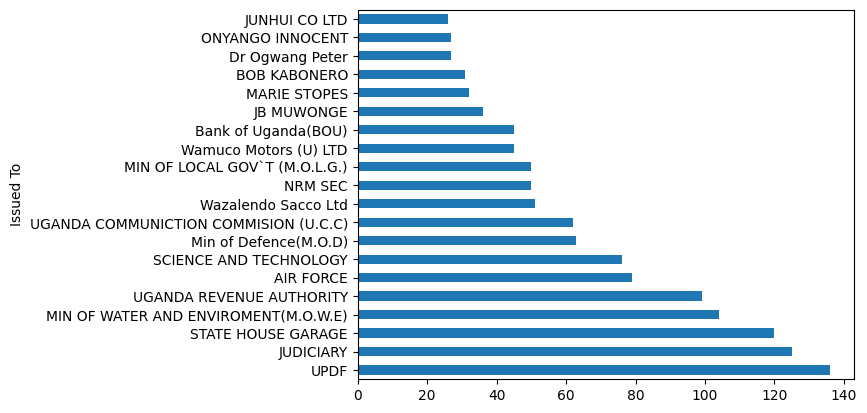

In [21]:
top20.plot(kind = 'barh')

In [22]:
last20 = df['Issued To'].value_counts().tail(20)
last20

Issued To
RICHARD KABONERO                       1
SHEEBA KYOBUTUNGI                      1
TYRE EXPRESS (U) LTD                   1
SUZAN KAMPI                            1
MALE MICHAEL                           1
AGE SAFARIS                            1
UNCST                                  1
MUZUNI                                 1
Dr NANDAULA MUTEMA                     1
Mayunge Sugar Ltd                      1
JORDAN M                               1
S.S.T                                  1
ROBERT KAWANSI                         1
Katale Augustine                       1
UAP INSURANCE /RICHARD KAREGYESA       1
TUMUSIIME GEOFREY                      1
DAVID / CO MARA MUSINGU                1
H.K SPARE PARTS                        1
LWANGA RODNEY                          1
JOSEPH/ INTERNATION JUSTICE MISSION    1
Name: count, dtype: int64

<b>Items Exploration</b>

In [23]:
df.head(1)

,Date,Issued To,Items,Quantity,Unit Price,Amount
1,2023-07-01,REMMY AKONYA,2K Silver Paint,1.0,90000.0,90000.0


In [24]:
df['Items'].nunique()

502

The store has 502 unique items

<b>Fast Moving items</b>

In [27]:
fast_moving_items = df['Items'].value_counts().head(100)
fast_moving_items

Items
Engine Oil Delo Silver SAE40/ Diesel Engine Oil      140
Thinner Standard                                      83
Strainers                                             77
Oil Filter 90915-YZZD2 - HILUX  90915-20003           68
Sand Paper P 60 -All                                  65
Black Duco                                            62
Masking Tape                                          61
Slow Thinner 601                                      52
Hardener Thinner 651 - All                            50
Thinner Clear                                         49
Rubbing Compound                                      48
Sand Paper P2000                                      45
SILCON TUBE                                           45
Filler Paste P-38-4 Kgs                               45
Supper Glue                                           45
A/c Filter 87139-30040/8713906050/87139-YZZ26         44
Degreaser 605                                         37
Tack Lag                 

<b>Amount Generated by each item</b>

In [29]:
# Calculating the amount generated by each item by multiplication
df["Total Amount"] = df["Quantity"] * df["Unit Price"]

# Top 50 items based on the total amount
top_50_items = df.groupby("Items")["Total Amount"].sum().nlargest(50)
print(top_50_items)

Items
G.T SARVERO TYRES 265/65R17                            75725000.00
Yokohama 265/65 R17 PRADO LJ 120                       30800000.00
GT SAVERO TYRES 265/70R16                              26400000.00
Milk                                                   16300800.00
Engine Oil Delo Silver SAE40/ Diesel Engine Oil        14321000.00
Brake Pads Frt 04465-60320 Prado/ KD2482               11691960.00
Steering Rack 44200-60130 L/c Vdj200r                  11310000.00
BRAKE BOOSTER ASSY 47050-60170                          9607000.00
FALKEN TYRES 315/80R22.5 SUPER TF RUCK                  7696000.00
Dunlop Tyres 285/50R20                                  6800000.00
Yokohama Tyre 285/70R17                                 5982472.00
Clutch Plate 31250-60382, 60383PRADO KDJ 150R           5480000.00
Thinner Clear                                           5420000.00
Bf Goodrich 265/75R16 ALL                               5405815.00
Bfgoodrich Tyres 285/55R20 L/cv8                        

<b>Trend Analysis</b>

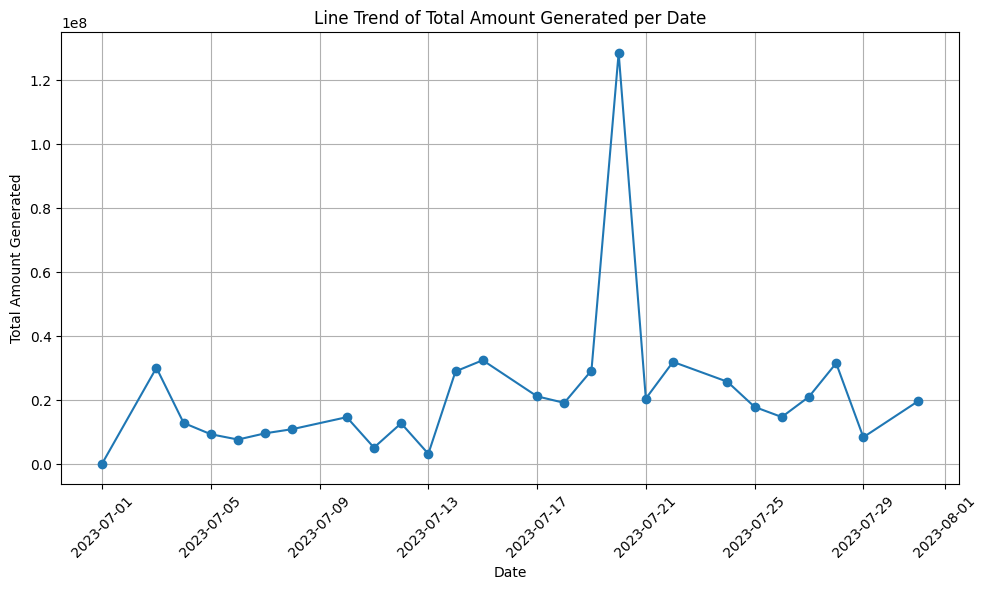

In [30]:
# Calculate the sum of total amount generated per date
date_total = df.groupby("Date")["Total Amount"].sum()

# Plot the line trend
plt.figure(figsize=(10, 6))
plt.plot(date_total.index, date_total.values, marker='o')
plt.title("Line Trend of Total Amount Generated per Date")
plt.xlabel("Date")
plt.ylabel("Total Amount Generated")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<b>Exporting File to Excel</b>

In [32]:
df.to_excel('July Issues 2023 Cleaned.xlsx', index = False)